In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from statsmodels.api import tsa

In [5]:
import plotly.graph_objs as go

In [6]:
air=pd.read_csv("/Users/harshith/Downloads/daily_air_df_missing.csv")

In [10]:
air.head()

Date  Revenue Passenger Miles  Available Seat Miles  \
0  1979-01-01                 0.533548              0.885712   
1  1979-01-02                 0.525592              0.877129   
2  1979-01-03                 0.492732              0.824325   
3  1979-01-04                 0.520035              0.897259   
4  1979-01-05                 0.527121              0.909226   

   Unused Seat Miles  
0           0.396440  
1           0.382670  
2           0.334139  
3           0.370691  
4           0.367735

In [12]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8320 entries, 0 to 8319
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     8320 non-null   object 
 1   Revenue Passenger Miles  8149 non-null   float64
 2   Available Seat Miles     8149 non-null   float64
 3   Unused Seat Miles        8149 non-null   float64
dtypes: float64(3), object(1)
memory usage: 260.1+ KB


In [14]:
air.isna().sum()

Date                         0
Revenue Passenger Miles    171
Available Seat Miles       171
Unused Seat Miles          171
dtype: int64

In [16]:
air['Date']=pd.to_datetime(air['Date'])
air=air.set_index('Date')
air.head()

Revenue Passenger Miles  Available Seat Miles  Unused Seat Miles
Date                                                                        
1979-01-01                 0.533548              0.885712           0.396440
1979-01-02                 0.525592              0.877129           0.382670
1979-01-03                 0.492732              0.824325           0.334139
1979-01-04                 0.520035              0.897259           0.370691
1979-01-05                 0.527121              0.909226           0.367735

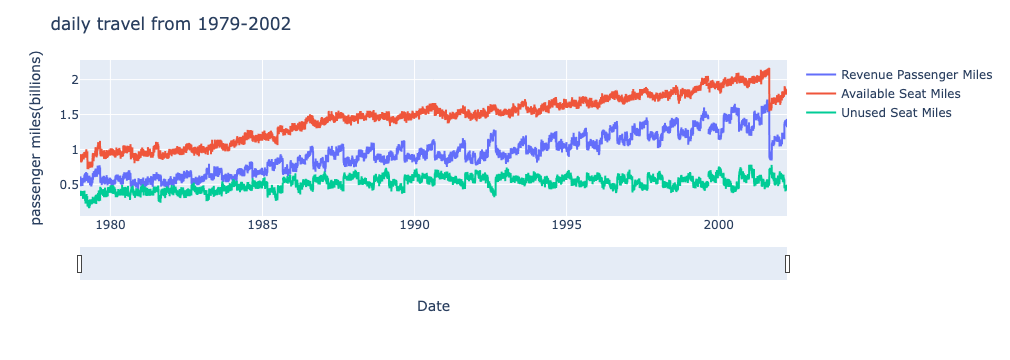

In [18]:
fig = px.line(air,x=air.index,y=air.columns,)
fig.update_layout(
    yaxis_title = "passenger miles(billions)",
    legend_title="",
    title="daily travel from 1979-2002"
)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [20]:
air.shape

(8320, 3)

In [22]:
first_day =air.index.min()
last_day = air.index.max()

In [24]:
print(first_day,"", last_day)

1979-01-01 00:00:00  2002-04-01 00:00:00


In [26]:
last_day-first_day

Timedelta('8491 days 00:00:00')

In [28]:
first_day +pd.DateOffset(years=1,months=3)

Timestamp('1980-04-01 00:00:00')

In [30]:
full_range = pd.date_range(start= first_day,end=last_day,freq='d')
full_range.difference(air.index)

DatetimeIndex(['1979-05-13', '1980-01-19', '1980-02-18', '1980-03-03',
               '1980-03-08', '1980-04-21', '1980-06-18', '1980-08-31',
               '1980-11-29', '1981-03-07',
               ...
               '2001-03-22', '2001-03-26', '2001-04-09', '2001-06-23',
               '2001-07-01', '2001-07-14', '2001-09-26', '2001-12-08',
               '2002-03-03', '2002-03-27'],
              dtype='datetime64[ns]', length=172, freq=None)

In [32]:
air[air.isna().any(axis=1)]

Revenue Passenger Miles  Available Seat Miles  Unused Seat Miles
Date                                                                        
1979-02-18                      NaN                   NaN                NaN
1979-03-22                      NaN                   NaN                NaN
1979-03-27                      NaN                   NaN                NaN
1979-06-30                      NaN                   NaN                NaN
1979-08-03                      NaN                   NaN                NaN
...                             ...                   ...                ...
2001-07-09                      NaN                   NaN                NaN
2001-09-11                      NaN                   NaN                NaN
2001-09-18                      NaN                   NaN                NaN
2001-11-07                      NaN                   NaN                NaN
2001-11-30                      NaN                   NaN                NaN

[171 rows x 3 columns]

In [34]:
air_clean = air.reindex(full_range)

In [36]:
air_clean.isna().sum()

Revenue Passenger Miles    343
Available Seat Miles       343
Unused Seat Miles          343
dtype: int64

In [38]:
air_clean = air_clean.ffill()

In [40]:
air_clean.isna().sum()

Revenue Passenger Miles    0
Available Seat Miles       0
Unused Seat Miles          0
dtype: int64

In [42]:
air_clean[air_clean.isna().any(axis=1)]

Empty DataFrame
Columns: [Revenue Passenger Miles, Available Seat Miles, Unused Seat Miles]
Index: []

In [44]:
air_monthly = air_clean.resample("MS").sum()
air_monthly.head()

Revenue Passenger Miles  Available Seat Miles  Unused Seat Miles
1979-01-01                16.225462             27.447213          11.492240
1979-02-01                15.617550             25.282803           9.911431
1979-03-01                19.442349             28.887230           9.185747
1979-04-01                17.095874             23.146433           6.191794
1979-05-01                16.630754             24.319654           7.776053

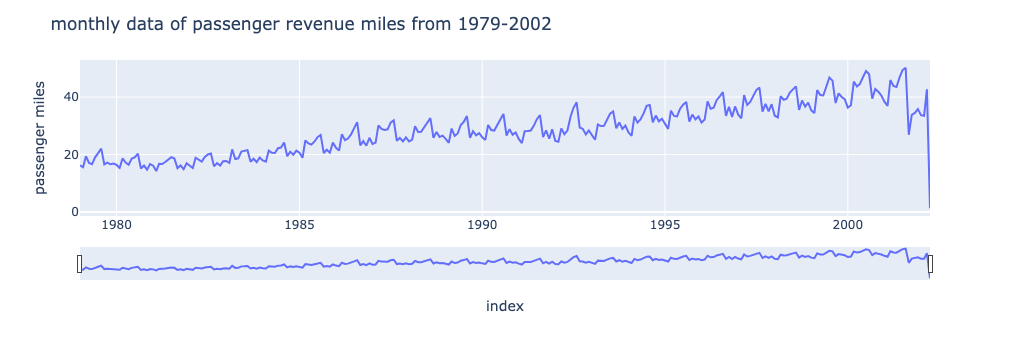

In [46]:
fig=px.line(air_monthly,x=air_monthly.index,y="Revenue Passenger Miles")
fig.update_layout(
    yaxis_title="passenger miles",
    legend_title="",
    title="monthly data of passenger revenue miles from 1979-2002"
)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [48]:
print(min)

<built-in function min>


In [50]:
air_monthly = air_monthly.loc[air_monthly.index <="2000-12-31",["Revenue Passenger Miles"]]
air_monthly.tail()

Revenue Passenger Miles
2000-08-01                47.924845
2000-09-01                39.423708
2000-10-01                42.792264
2000-11-01                41.866135
2000-12-01                40.532981

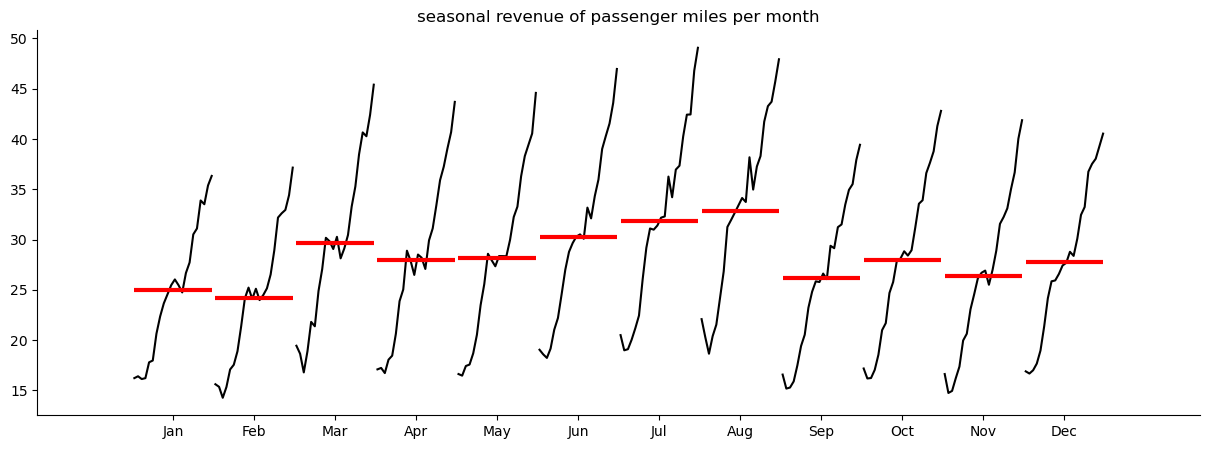

In [52]:
from statsmodels.graphics.tsaplots import month_plot
plt.figure(figsize=(15,5))
month_plot(air_monthly["Revenue Passenger Miles"], ax=plt.gca())
plt.title("seasonal revenue of passenger miles per month")
sns.despine()
plt.show()

In [54]:
monthly_mean=air_monthly.groupby(air_monthly.index.month_name()).mean()
monthly_mean_diff = (monthly_mean-monthly_mean.mean())/monthly_mean
month_names = pd.date_range(start='2000-01',freq='ME',periods=12).month_name()
monthly_mean_diff = monthly_mean_diff.loc[month_names,]
monthly_mean_diff.T

January  February     March     April       May  \
Revenue Passenger Miles -0.129783  -0.16439  0.048641 -0.007799 -0.000133   

                             June      July    August  September   October  \
Revenue Passenger Miles  0.069218  0.115753  0.141437  -0.077803 -0.006083   

                         November  December  
Revenue Passenger Miles  -0.06938 -0.014299

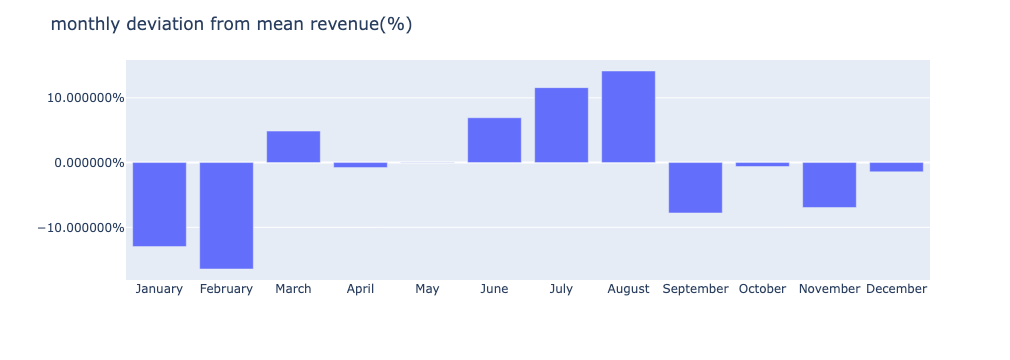

In [56]:
fig=px.bar(monthly_mean_diff)
fig.update_layout(
    yaxis_title="",
    yaxis_tickformat='%',
    xaxis_title="",
    title="monthly deviation from mean revenue(%)",
    showlegend=False,
)
fig.show()

In [58]:
decompositin=tsa.seasonal_decompose(air_monthly,model='additive')

In [60]:
print(decompositin)

In [62]:
air_monthly["Trend"]=decompositin.trend
air_monthly["Seasonal"]=decompositin.seasonal
air_monthly["Residual"]=decompositin.resid

In [64]:
air_monthly.head(10)

Revenue Passenger Miles      Trend  Seasonal  Residual
1979-01-01                16.225462        NaN -2.774129       NaN
1979-02-01                15.617550        NaN -3.629840       NaN
1979-03-01                19.442349        NaN  1.769405       NaN
1979-04-01                17.095874        NaN  0.046954       NaN
1979-05-01                16.630754        NaN  0.192782       NaN
1979-06-01                19.045393        NaN  2.180432       NaN
1979-07-01                20.500506  17.835749  3.530915 -0.866158
1979-08-01                22.089042  17.832668  4.501588 -0.245215
1979-09-01                16.578041  17.788833 -2.183051  0.972258
1979-10-01                17.183491  17.761686 -0.494891 -0.083304

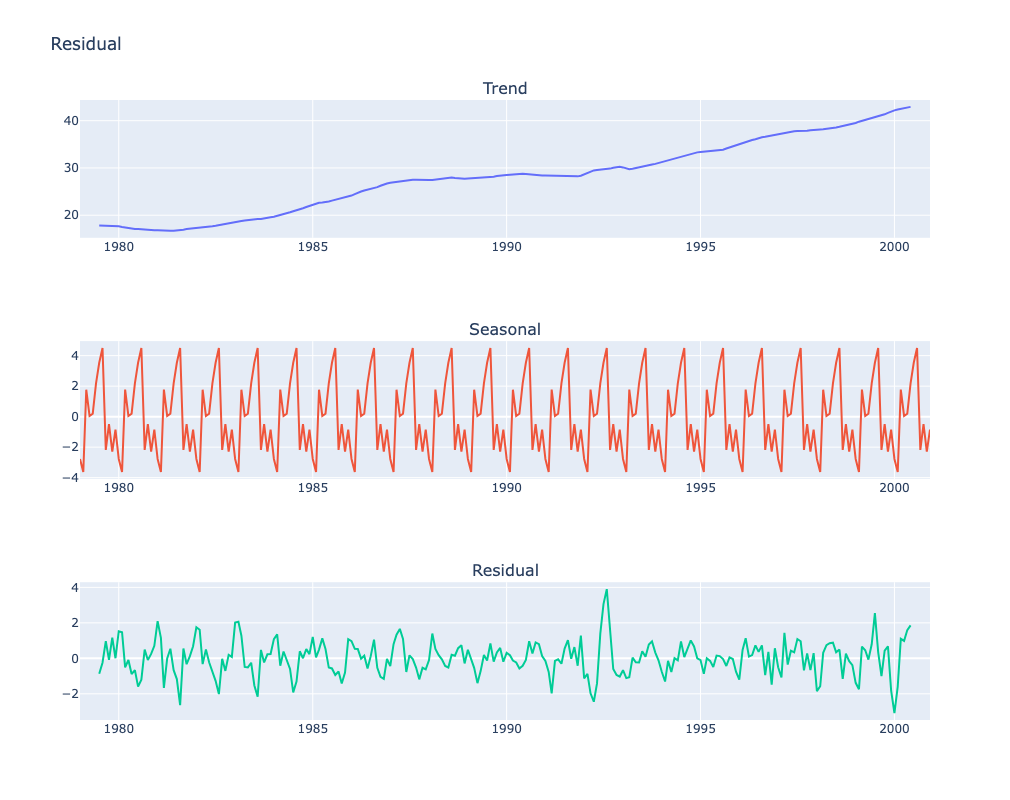

In [66]:
cols=["Trend","Seasonal","Residual"]
fig = make_subplots(rows=3,cols=1,subplot_titles=cols)

for i,col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=air_monthly.index,y=air_monthly[col]),
        row=i+1,
        col=1
    )
fig.update_layout(title_text=col,   height=800,width=1200,showlegend=False)
fig.show()

In [68]:
air_monthly["seasonal_difference"]=air_monthly["Revenue Passenger Miles"].diff(12)

In [70]:
air_monthly[["Revenue Passenger Miles","seasonal_difference"]].head(20)

Revenue Passenger Miles  seasonal_difference
1979-01-01                16.225462                  NaN
1979-02-01                15.617550                  NaN
1979-03-01                19.442349                  NaN
1979-04-01                17.095874                  NaN
1979-05-01                16.630754                  NaN
1979-06-01                19.045393                  NaN
1979-07-01                20.500506                  NaN
1979-08-01                22.089042                  NaN
1979-09-01                16.578041                  NaN
1979-10-01                17.183491                  NaN
1979-11-01                16.631207                  NaN
1979-12-01                16.897289                  NaN
1980-01-01                16.409522             0.184060
1980-02-01                15.359557            -0.257994
1980-03-01                18.648304            -0.794046
1980-04-01                17.238380             0.142507
1980-05-01                16.471593            -0.159161
1980-06-01                18.590191            -0.455202
1980-07-01                18.989968            -1.510538
1980-08-01                20.298789            -1.790254

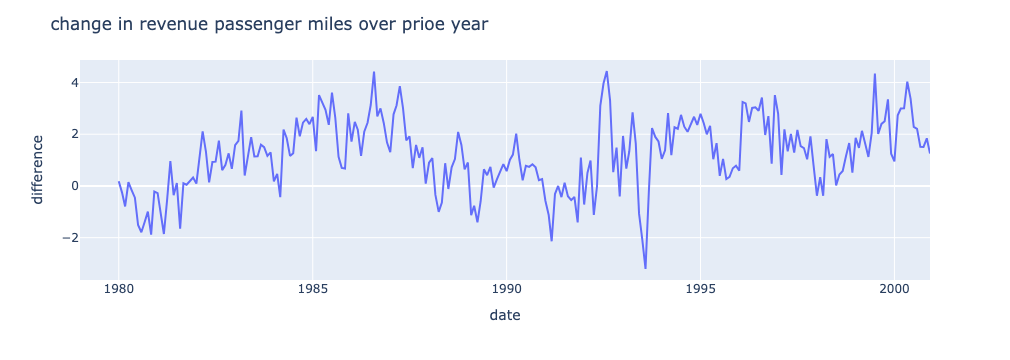

In [72]:
fig=px.line(air_monthly,x=air_monthly.index,y="seasonal_difference")
fig.update_layout(
    yaxis_title="difference",
    xaxis_title="date",
    title="change in revenue passenger miles over prioe year"
)
fig.show()

mean absolute % error = it is sum of absolute values between true values and predicted values / sum of true values

In [75]:
split_date = '1997-01-01'

train = air_monthly.loc[air_monthly.index <= split_date, 'seasonal_difference']
test  = air_monthly.loc[air_monthly.index  > split_date, 'seasonal_difference']


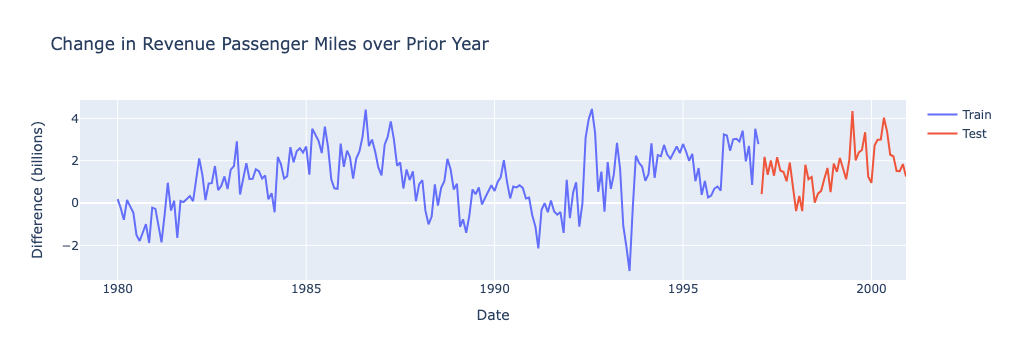

In [77]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.update_layout(
    yaxis_title="Difference (billions)",
    xaxis_title="Date",
    title="Change in Revenue Passenger Miles over Prior Year"
)
fig.show()


base model or naive model, map 0-100 or greater%

In [80]:
full_index=pd.concat([train, test]).index
base_line=np.full(full_index.shape,np.mean(train))
predictions = pd.Series(data=base_line,index=full_index)

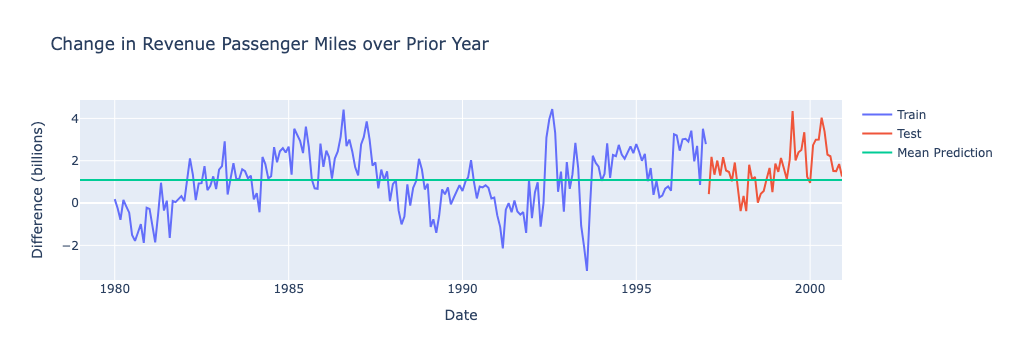

In [82]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode='lines', name="Mean Prediction"))

fig.update_layout(
    yaxis_title="Difference (billions)",
    xaxis_title="Date",
    title="Change in Revenue Passenger Miles over Prior Year"
)
fig.show()


In [84]:
def mean_absolute_percentage_error(true_values, predicted_values):
    error = true_values - predicted_values
    absolute_percentage_error = np.abs(error/true_values)
    mape = absolute_percentage_error.mean() * 100
    return mape

train_mape = mean_absolute_percentage_error(train, predictions[train.index])
test_mape = mean_absolute_percentage_error(test, predictions[test.index])
print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")


Train MAPE on the difference: 434.11%
Test MAPE on the difference: 186.15%


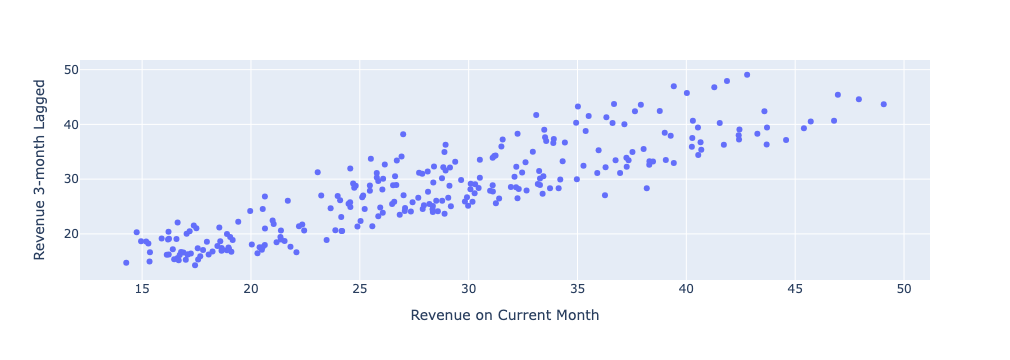

In [86]:
fig = px.scatter(
    x=air_monthly["Revenue Passenger Miles"],
    y=air_monthly["Revenue Passenger Miles"].shift(3)  
)
fig.update_layout(
    xaxis_title="Revenue on Current Month",
    yaxis_title="Revenue 3-month Lagged"
)
fig.show()


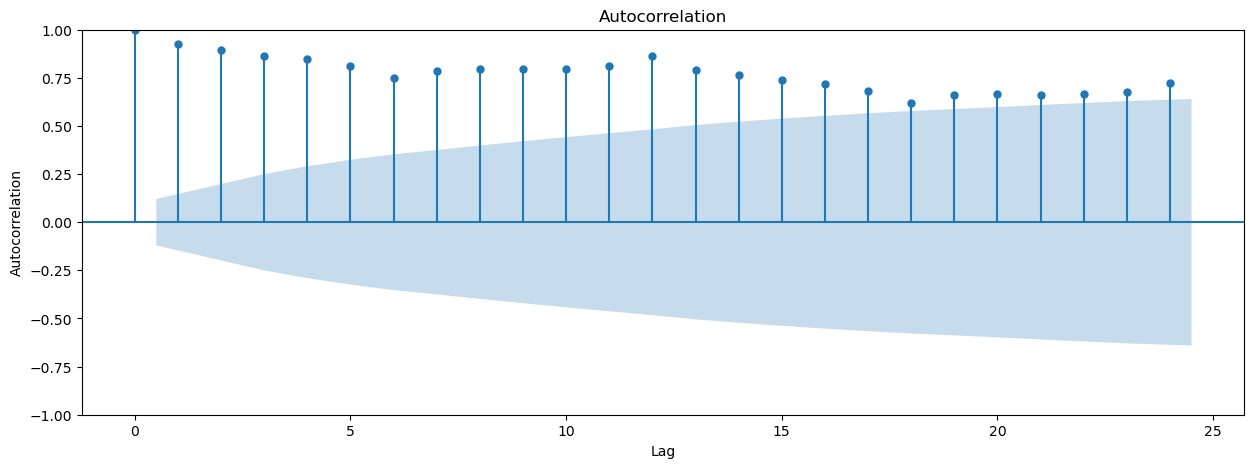

In [90]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 5))

plot_acf(air_monthly["Revenue Passenger Miles"], lags=24, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


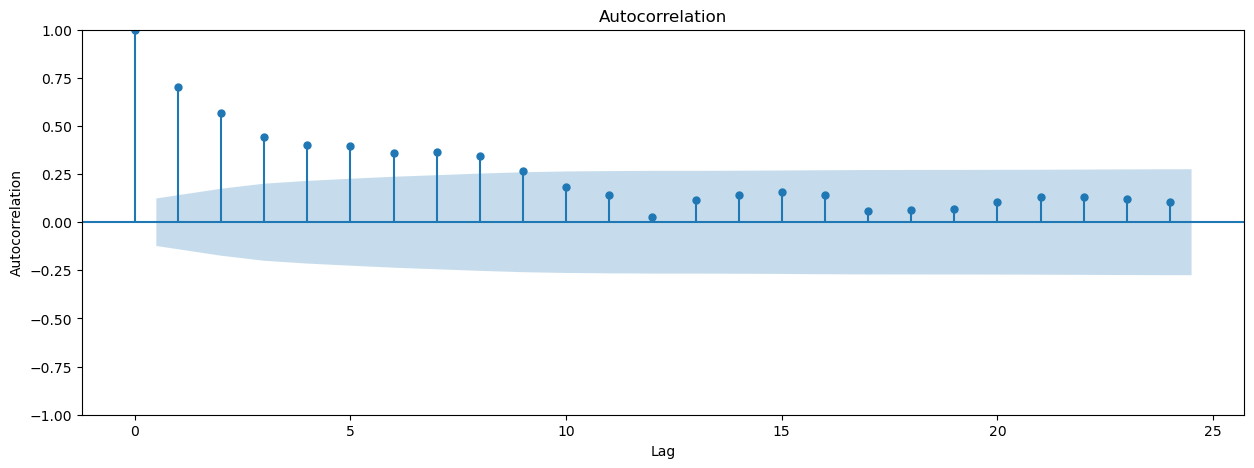

In [92]:

plt.figure(figsize=(15, 5))

plot_acf(air_monthly["seasonal_difference"].dropna(), lags=24, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


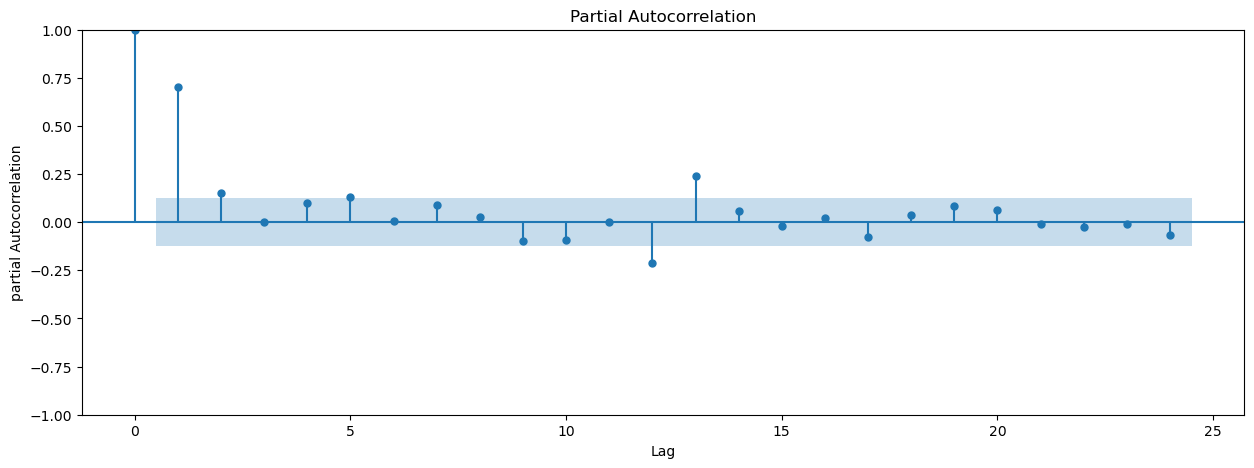

In [96]:

plt.figure(figsize=(15, 5))

plot_pacf(air_monthly["seasonal_difference"].dropna(), lags=24, ax=plt.gca(), method='ywm')
plt.xlabel('Lag')
plt.ylabel('partial Autocorrelation')
plt.show()


In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
p_param = 2
model= SARIMAX(train,order=(p_param, 0,0),trend="c")
model_fit =model.fit(disp=0)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     seasonal_difference   No. Observations:                  217
Model:                SARIMAX(2, 0, 0)   Log Likelihood                -284.591
Date:                 Sat, 19 Apr 2025   AIC                            577.183
Time:                         23:51:48   BIC                            590.702
Sample:                     01-01-1979   HQIC                           582.644
                          - 01-01-1997                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2664      0.079      3.353      0.001       0.111       0.422
ar.L1          0.6234      0.064      9.689      0.000       0.497       0.749
ar.L2          0.1357      0.059      2.286      0.022       0.019       0.252
sigma2         0.9369      0.089     10.525      0.000       0.762       1.111
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.93
Prob(Q):                              0.92   Prob(JB):                         0.14
Heteroskedasticity (H):               2.35   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
predictions=model_fit.predict(start=0,end=len(train)+len(test)-1)

In [106]:
predictions.head(20)

1979-01-01    1.105842
1979-02-01    1.105842
1979-03-01    1.105842
1979-04-01    1.105842
1979-05-01    1.105842
1979-06-01    1.105842
1979-07-01    1.105842
1979-08-01    1.105842
1979-09-01    1.105842
1979-10-01    1.105842
1979-11-01    1.105842
1979-12-01    1.105842
1980-01-01    1.105842
1980-02-01    0.441020
1980-03-01    0.130589
1980-04-01   -0.263553
1980-05-01    0.247532
1980-06-01    0.186560
1980-07-01   -0.038917
1980-08-01   -0.736953
Freq: MS, Name: predicted_mean, dtype: float64

In [108]:
train.index.max()

Timestamp('1997-01-01 00:00:00')

In [110]:
model_fit.forecast(steps=5)

1997-02-01    2.479500
1997-03-01    2.190126
1997-04-01    1.968144
1997-05-01    1.790503
1997-06-01    1.649645
Freq: MS, Name: predicted_mean, dtype: float64

In [112]:
predictions[len(train): len(train)+5]

1997-02-01    2.479500
1997-03-01    2.190126
1997-04-01    1.968144
1997-05-01    1.790503
1997-06-01    1.649645
Freq: MS, Name: predicted_mean, dtype: float64

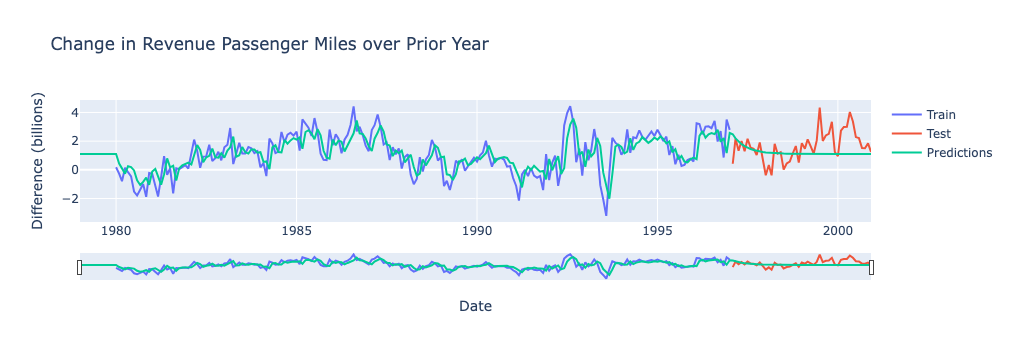

In [114]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode='lines', name="Predictions"))
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title="Difference (billions)",
    xaxis_title="Date",
    title="Change in Revenue Passenger Miles over Prior Year"
)
fig.show()


In [116]:
train_mape = mean_absolute_percentage_error(train, predictions[train.index])
test_mape = mean_absolute_percentage_error(test, predictions[test.index])

print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")


Train MAPE on the difference: 162.99%
Test MAPE on the difference: 197.82%


In [118]:
first_year_indices = air_monthly.index[:12]
remaining_indices = air_monthly.index[12:]

# create an empty restored column
air_monthly["restored"] = np.nan

# fill in the first 12 original values into the empty restored column
air_monthly.loc[first_year_indices, "restored"] = \
    air_monthly.loc[first_year_indices, "Revenue Passenger Miles"]

# use the current difference value and 12-month lagged restored value to get the next restored value
for current_date in remaining_indices:
    current_value = air_monthly.loc[current_date, "seasonal_difference"]
    year_before_restored = air_monthly.loc[current_date - pd.DateOffset(months=12), "restored"]

    air_monthly.loc[current_date, "restored"] = year_before_restored + current_value

# check agreement everywhere (rounding errors can come up so check closeness rather than strict equality)
np.allclose(
    air_monthly["Revenue Passenger Miles"],
    air_monthly["restored"]
)


True

In [122]:
# use the original train diff values and predicted test values
air_monthly.loc[train.index, "AR_difference"] = air_monthly.loc[train.index, "seasonal_difference"]
air_monthly.loc[test.index, "AR_difference"] = predictions[test.index]
air_monthly.head(20)


Revenue Passenger Miles      Trend  Seasonal  Residual  \
1979-01-01                16.225462        NaN -2.774129       NaN   
1979-02-01                15.617550        NaN -3.629840       NaN   
1979-03-01                19.442349        NaN  1.769405       NaN   
1979-04-01                17.095874        NaN  0.046954       NaN   
1979-05-01                16.630754        NaN  0.192782       NaN   
1979-06-01                19.045393        NaN  2.180432       NaN   
1979-07-01                20.500506  17.835749  3.530915 -0.866158   
1979-08-01                22.089042  17.832668  4.501588 -0.245215   
1979-09-01                16.578041  17.788833 -2.183051  0.972258   
1979-10-01                17.183491  17.761686 -0.494891 -0.083304   
1979-11-01                16.631207  17.760992 -2.296057  1.166272   
1979-12-01                16.897289  17.735394 -0.844109  0.006004   
1980-01-01                16.409522  17.653488 -2.774129  1.530164   
1980-02-01                15.359557  17.515955 -3.629840  1.473442   
1980-03-01                18.648304  17.383315  1.769405 -0.504416   
1980-04-01                17.238380  17.283881  0.046954 -0.092455   
1980-05-01                16.471593  17.164109  0.192782 -0.885298   
1980-06-01                18.590191  17.076699  2.180432 -0.666941   
1980-07-01                18.989968  17.056165  3.530915 -1.597112   
1980-08-01                20.298789  16.999296  4.501588 -1.202096   

            seasonal_difference   restored  AR_difference  
1979-01-01                  NaN  16.225462            NaN  
1979-02-01                  NaN  15.617550            NaN  
1979-03-01                  NaN  19.442349            NaN  
1979-04-01                  NaN  17.095874            NaN  
1979-05-01                  NaN  16.630754            NaN  
1979-06-01                  NaN  19.045393            NaN  
1979-07-01                  NaN  20.500506            NaN  
1979-08-01                  NaN  22.089042            NaN  
1979-09-01                  NaN  16.578041            NaN  
1979-10-01                  NaN  17.183491            NaN  
1979-11-01                  NaN  16.631207            NaN  
1979-12-01                  NaN  16.897289            NaN  
1980-01-01             0.184060  16.409522       0.184060  
1980-02-01            -0.257994  15.359557      -0.257994  
1980-03-01            -0.794046  18.648304      -0.794046  
1980-04-01             0.142507  17.238380       0.142507  
1980-05-01            -0.159161  16.471593      -0.159161  
1980-06-01            -0.455202  18.590191      -0.455202  
1980-07-01            -1.510538  18.989968      -1.510538  
1980-08-01            -1.790254  20.298789      -1.790254

In [126]:
# empty restored column
air_monthly["AR_restored"] = np.nan

# fill in the first 12 original values
air_monthly.loc[first_year_indices, "AR_restored"] = \
    air_monthly.loc[first_year_indices, "Revenue Passenger Miles"]

# use the current difference and 12‑month lagged restored value to get the next restored
for current_date in remaining_indices:
    current_value = air_monthly.loc[current_date, "AR_difference"]
    year_before_restored = air_monthly.loc[
        current_date - pd.DateOffset(months=12), 
        "AR_restored"
    ]

    air_monthly.loc[current_date, "AR_restored"] = year_before_restored + current_value


In [128]:
air_monthly.head(14)

Revenue Passenger Miles      Trend  Seasonal  Residual  \
1979-01-01                16.225462        NaN -2.774129       NaN   
1979-02-01                15.617550        NaN -3.629840       NaN   
1979-03-01                19.442349        NaN  1.769405       NaN   
1979-04-01                17.095874        NaN  0.046954       NaN   
1979-05-01                16.630754        NaN  0.192782       NaN   
1979-06-01                19.045393        NaN  2.180432       NaN   
1979-07-01                20.500506  17.835749  3.530915 -0.866158   
1979-08-01                22.089042  17.832668  4.501588 -0.245215   
1979-09-01                16.578041  17.788833 -2.183051  0.972258   
1979-10-01                17.183491  17.761686 -0.494891 -0.083304   
1979-11-01                16.631207  17.760992 -2.296057  1.166272   
1979-12-01                16.897289  17.735394 -0.844109  0.006004   
1980-01-01                16.409522  17.653488 -2.774129  1.530164   
1980-02-01                15.359557  17.515955 -3.629840  1.473442   

            seasonal_difference   restored  AR_difference  AR_restored  
1979-01-01                  NaN  16.225462            NaN    16.225462  
1979-02-01                  NaN  15.617550            NaN    15.617550  
1979-03-01                  NaN  19.442349            NaN    19.442349  
1979-04-01                  NaN  17.095874            NaN    17.095874  
1979-05-01                  NaN  16.630754            NaN    16.630754  
1979-06-01                  NaN  19.045393            NaN    19.045393  
1979-07-01                  NaN  20.500506            NaN    20.500506  
1979-08-01                  NaN  22.089042            NaN    22.089042  
1979-09-01                  NaN  16.578041            NaN    16.578041  
1979-10-01                  NaN  17.183491            NaN    17.183491  
1979-11-01                  NaN  16.631207            NaN    16.631207  
1979-12-01                  NaN  16.897289            NaN    16.897289  
1980-01-01             0.184060  16.409522       0.184060    16.409522  
1980-02-01            -0.257994  15.359557      -0.257994    15.359557

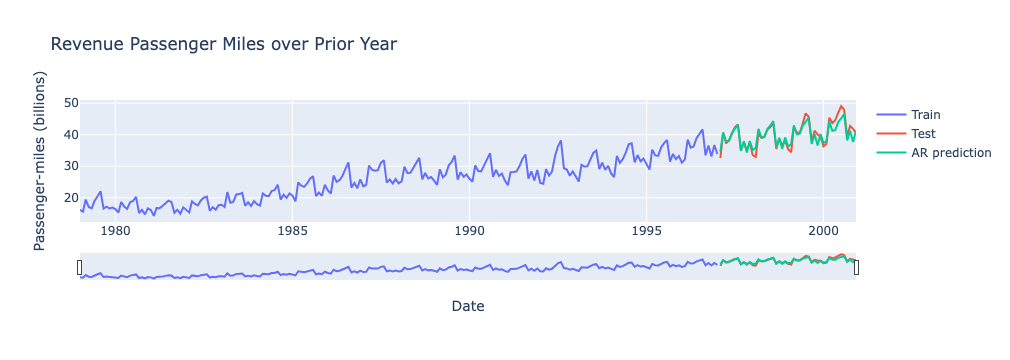

In [130]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=train.index,
    y=air_monthly.loc[train.index, "Revenue Passenger Miles"],
    mode='lines',
    name="Train"
))
fig.add_trace(go.Scatter(
    x=test.index,
    y=air_monthly.loc[test.index, "Revenue Passenger Miles"],
    mode='lines',
    name="Test"
))
fig.add_trace(go.Scatter(
    x=test.index,
    y=air_monthly.loc[test.index, "AR_restored"],
    mode='lines',
    name="AR prediction"
))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title="Passenger‑miles (billions)",
    xaxis_title="Date",
    title="Revenue Passenger Miles over Prior Year"
)
fig.show()


In [132]:
p_param = 2
d_param = 0
q_param = 1

model = SARIMAX(train, order=(p_param, d_param, q_param), trend="c")
model_fit = model.fit(disp=0)

model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     seasonal_difference   No. Observations:                  217
Model:                SARIMAX(2, 0, 1)   Log Likelihood                -284.323
Date:                 Sun, 20 Apr 2025   AIC                            578.646
Time:                         00:15:48   BIC                            595.546
Sample:                     01-01-1979   HQIC                           585.473
                          - 01-01-1997                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3648      0.180      2.028      0.043       0.012       0.718
ar.L1          0.3017      0.454      0.665      0.506      -0.587       1.191
ar.L2          0.3687      0.318      1.160      0.246      -0.254       0.992
ma.L1          0.3274      0.465      0.704      0.481      -0.584       1.239
sigma2         0.9344      0.089     10.449      0.000       0.759       1.110
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.10
Prob(Q):                              0.95   Prob(JB):                         0.13
Heteroskedasticity (H):               2.30   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [134]:
predictions = model_fit.predict(start=0, end=len(train) + len(test) - 1)

train_mape = mean_absolute_percentage_error(train, predictions[train.index])
test_mape = mean_absolute_percentage_error(test, predictions[test.index])

print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")


Train MAPE on the difference: 164.13%
Test MAPE on the difference: 197.3%


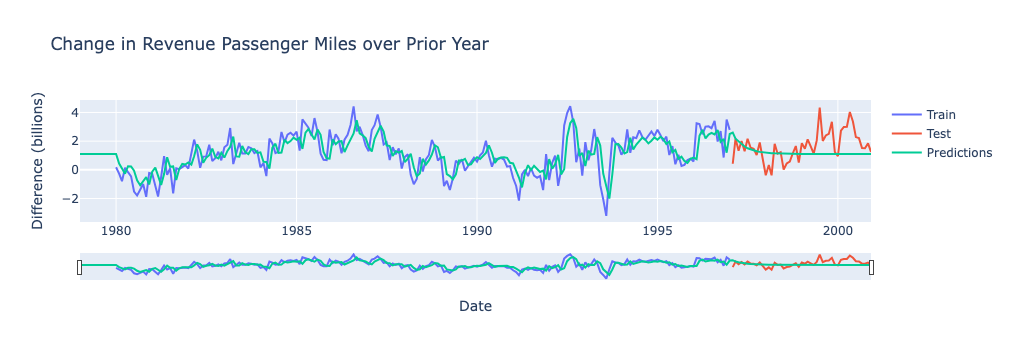

In [136]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode='lines', name="Predictions"))
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title="Difference (billions)",
    xaxis_title="Date",
    title="Change in Revenue Passenger Miles over Prior Year"
)
fig.show()
